In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("../../../csv/v2/050_gardiner_flow_processed.csv.zip")
df["collectedAt"] = pd.to_datetime(df["collectedAt"],utc=True)
df.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt
0,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:45:00+00:00
1,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:51:44+00:00
2,75,93,372,300,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:55:27+00:00
3,72,94,388,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:00:00+00:00
4,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:05:00+00:00


In [5]:
df = df.sort_values(by="collectedAt")
df.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt
0,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:45:00+00:00
1,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:51:44+00:00
2,75,93,372,300,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:55:27+00:00
3,72,94,388,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:00:00+00:00
4,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:05:00+00:00


In [6]:
df["current_distance"] = df.apply(lambda x: x["currentSpeed"]*(x["currentTravelTime"]/3600),axis=1)
df["freeFlow_distance"] = df.apply(lambda x: x["freeFlowSpeed"]*(x["freeFlowTravelTime"]/3600),axis=1)
df.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,current_distance,freeFlow_distance
0,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:45:00+00:00,7.755,7.755
1,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:51:44+00:00,7.755,7.755
2,75,93,372,300,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:55:27+00:00,7.750,7.750
3,72,94,388,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:00:00+00:00,7.760,7.755
4,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:05:00+00:00,7.755,7.755


In [12]:
dist_df = df[["current_distance","freeFlow_distance"]]
dist_df.head()

,current_distance,freeFlow_distance
0,7.755,7.755
1,7.755,7.755
2,7.750,7.750
3,7.760,7.755
4,7.755,7.755


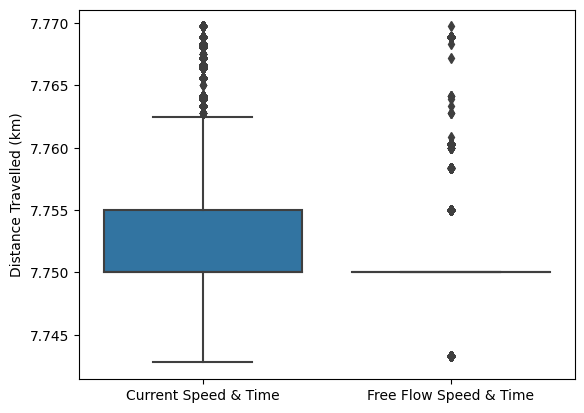

In [20]:
xlabels=["Current Speed & Time", "Free Flow Speed & Time"]

ax = sns.boxplot(x="variable",y="value",data=pd.melt(dist_df))
ax.set(xlabel="",ylabel="Distance Travelled (km)",xticklabels=xlabels)

plt.savefig("./plots/065_distance_travelled.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/065_distance_travelled.png",bbox_inches="tight")